In [1]:
from sklearn.datasets import load_iris
from sklearn.manifold import TSNE

import pandas as pd

import matplotlib.pyplot as plt
from mlp_personal_style.dark import seadark

In [2]:
data = load_iris()
names_map = {
    idx: name
    for idx,name in enumerate(data["target_names"])
}
df = pd.DataFrame(data["data"], columns=data["feature_names"]).assign(target=[names_map.get(val) for val in data["target"]])


In [3]:
tsne = TSNE().fit_transform(df.drop("target", axis=1))
tsne_df = pd.DataFrame(tsne, columns=["TSNE1", "TSNE2"]).assign(target=df["target"])

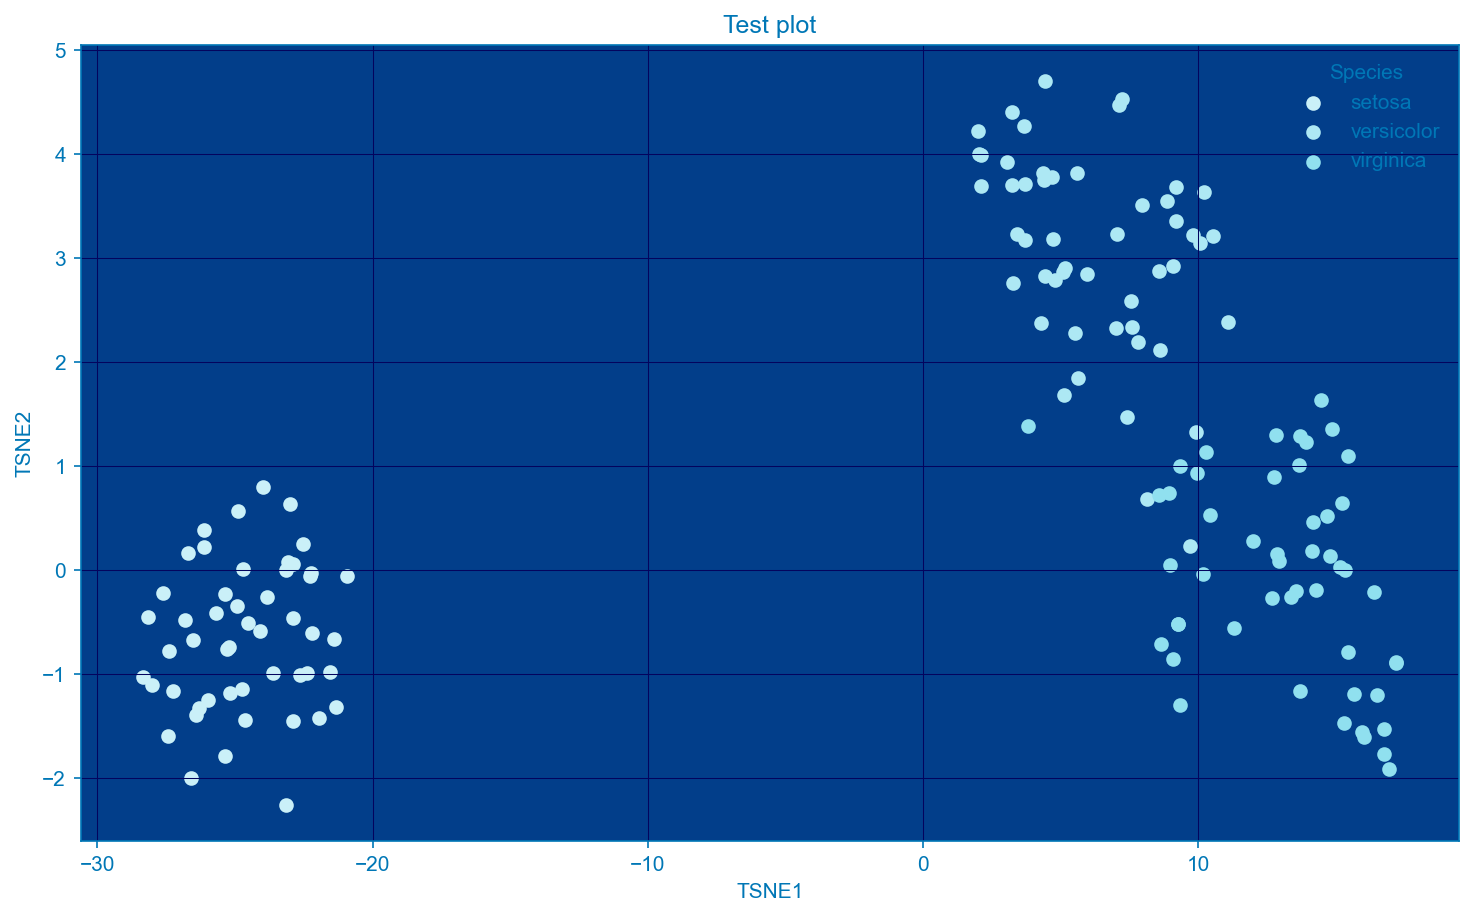

In [4]:
with plt.style.context(seadark):
    fig, ax = plt.subplots()
    for name, grouped_df in tsne_df.groupby("target"):
        ax.scatter(grouped_df["TSNE1"], 
                grouped_df["TSNE2"], label=name)

    ax.set(xlabel="TSNE1", ylabel="TSNE2", title="Test plot")
    ax.legend(title="Species")
    plt.show()